In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
file_path = "/content/drive/MyDrive/Internships/Edunet-IBM-AI/employee_burnout_analysis-AI 2 (2).xlsx"  # Update if path changes
data = pd.read_excel(file_path)

# Display the first few rows
print("Dataset Shape:", data.shape)
data.head()



Dataset Shape: (22750, 9)


,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [27]:
# Check the first few rows of the dataset
print(data.head())

# Inspect the columns and their data types
print(data.info())

# Checking missing values
print("Missing Values:\n", data.isnull().sum())

# Filling missing values
data['Resource Allocation'] = data['Resource Allocation'].fillna(data['Resource Allocation'].mean())
data['Mental Fatigue Score'] = data['Mental Fatigue Score'].fillna(data['Mental Fatigue Score'].mean())
data['Burn Rate'] = data['Burn Rate'].fillna(data['Burn Rate'].mean())

# Verify missing values are handled
print("Missing Values After Cleaning:\n", data.isnull().sum())


                Employee ID Date of Joining  Gender Company Type  \
0  fffe32003000360033003200      2008-09-30  Female      Service   
1      fffe3700360033003500      2008-11-30    Male      Service   
2  fffe31003300320037003900      2008-03-10  Female      Product   
3  fffe32003400380032003900      2008-11-03    Male      Service   
4  fffe31003900340031003600      2008-07-24  Female      Service   

  WFH Setup Available  Designation  Resource Allocation  Mental Fatigue Score  \
0                  No            2                  3.0                   3.8   
1                 Yes            1                  2.0                   5.0   
2                 Yes            2                  NaN                   5.8   
3                 Yes            1                  1.0                   2.6   
4                  No            3                  7.0                   6.9   

   Burn Rate  
0       0.16  
1       0.36  
2       0.49  
3       0.20  
4       0.52  
<class 'pandas

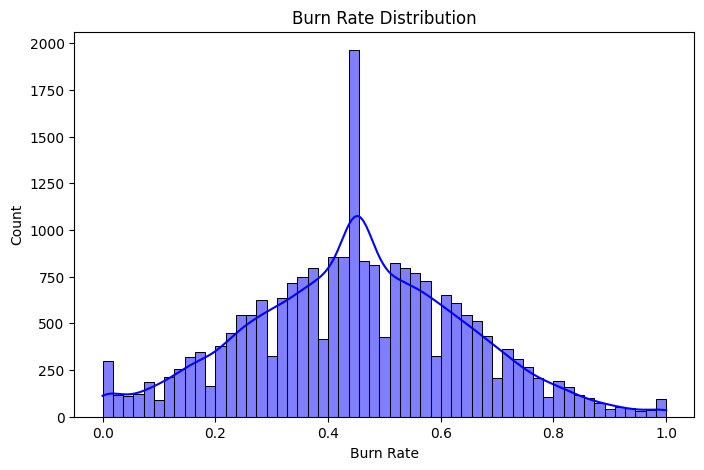

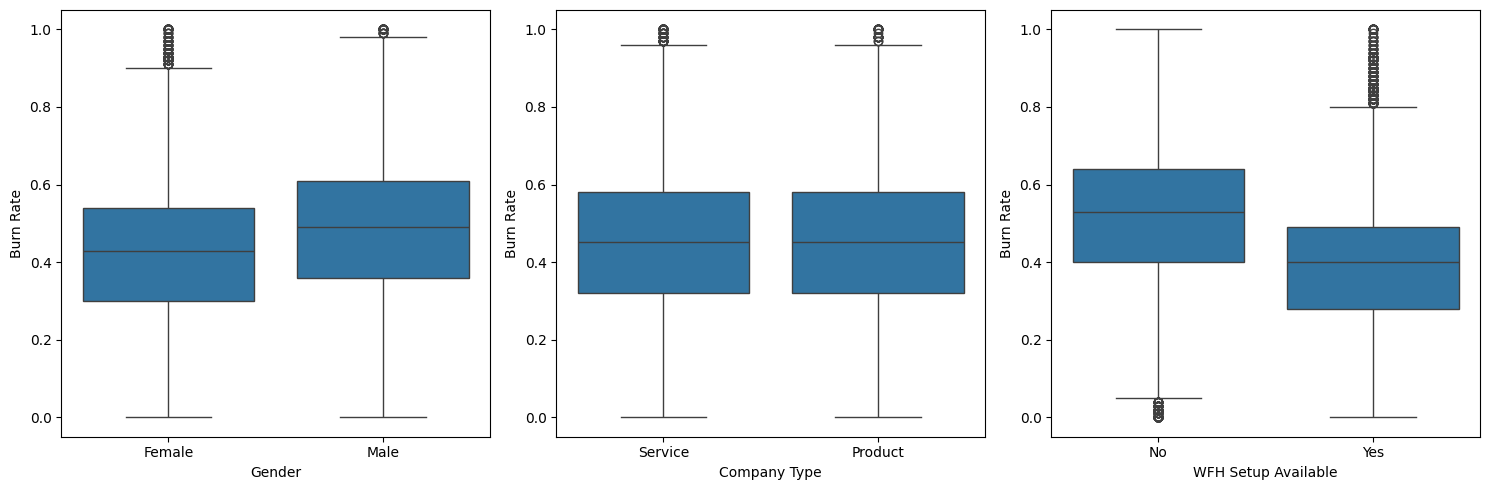

In [28]:
# Distribution of Burn Rate
plt.figure(figsize=(8, 5))
sns.histplot(data['Burn Rate'], kde=True, color='blue')
plt.title("Burn Rate Distribution")
plt.show()

# Boxplot for categorical variables
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(x='Gender', y='Burn Rate', data=data, ax=axes[0])
sns.boxplot(x='Company Type', y='Burn Rate', data=data, ax=axes[1])
sns.boxplot(x='WFH Setup Available', y='Burn Rate', data=data, ax=axes[2])
plt.tight_layout()
plt.show()



Employee ID                     object
Date of Joining         datetime64[ns]
Gender                          object
Company Type                    object
WFH Setup Available             object
Designation                      int64
Resource Allocation            float64
Mental Fatigue Score           float64
Burn Rate                      float64
dtype: object


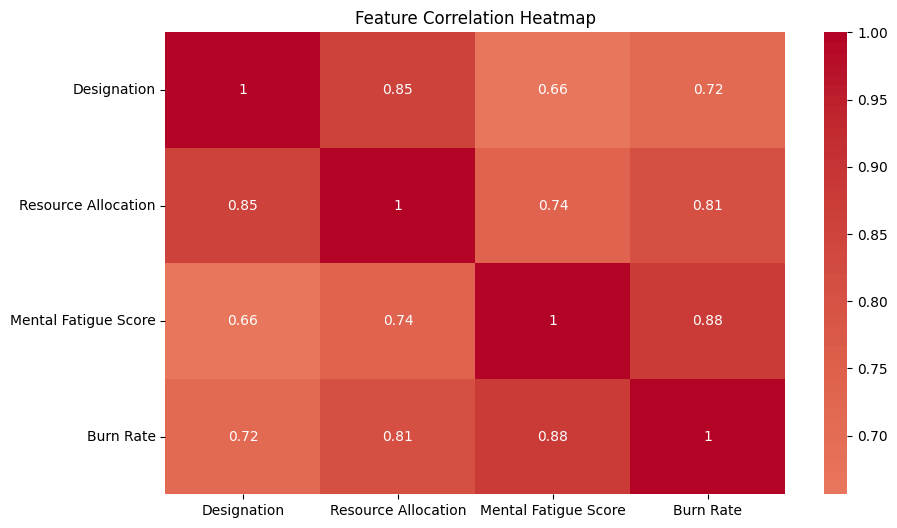

In [31]:
print(data.dtypes)  # Check the data types of each column
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap")
plt.show()


In [32]:
# Extracting year and month from Date of Joining
data['Date of Joining'] = pd.to_datetime(data['Date of Joining'])
data['Join_Year'] = data['Date of Joining'].dt.year
data['Join_Month'] = data['Date of Joining'].dt.month

# Encoding categorical variables
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data['Company Type'] = data['Company Type'].map({'Product': 0, 'Service': 1})
data['WFH Setup Available'] = data['WFH Setup Available'].map({'No': 0, 'Yes': 1})

# Drop unnecessary columns
data.drop(['Employee ID', 'Date of Joining'], axis=1, inplace=True)


<ipython-input-33-6327c850d56a>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance, palette='viridis')


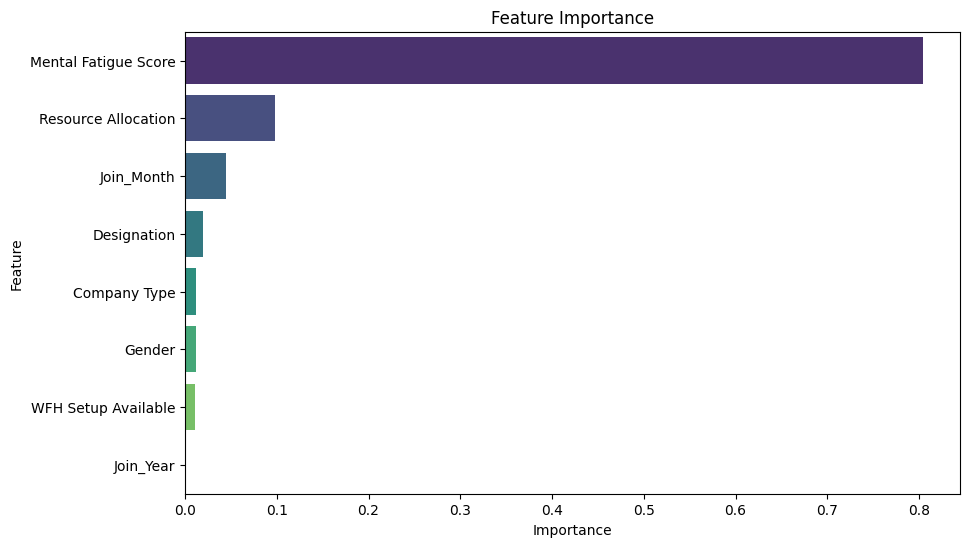

In [33]:
# Defining features and target
X = data.drop('Burn Rate', axis=1)
y = data['Burn Rate']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model for feature importance
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Feature importance plot
importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
importance = importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance, palette='viridis')
plt.title("Feature Importance")
plt.show()


In [43]:
# Using Random Forest Regressor
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Model Performance:")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R-squared Score: {r2:.4f}")


Model Performance:
Mean Absolute Error: 0.0567
Mean Squared Error: 0.0060
Root Mean Squared Error: 0.0776
R-squared Score: 0.8327


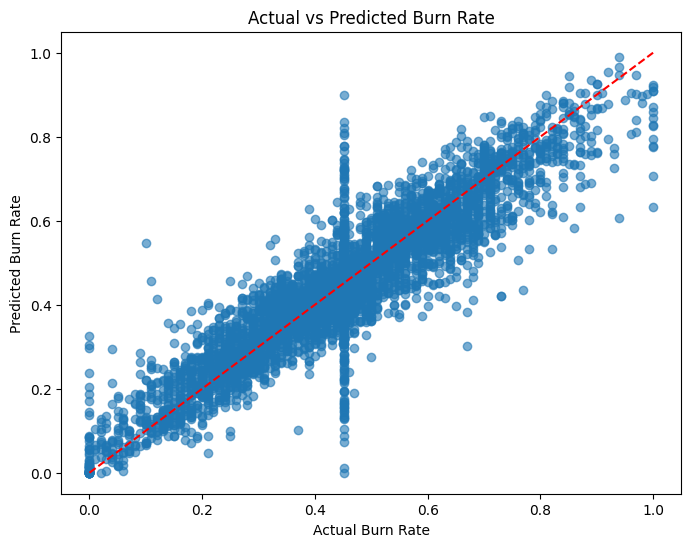

In [35]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Burn Rate")
plt.ylabel("Predicted Burn Rate")
plt.title("Actual vs Predicted Burn Rate")
plt.show()


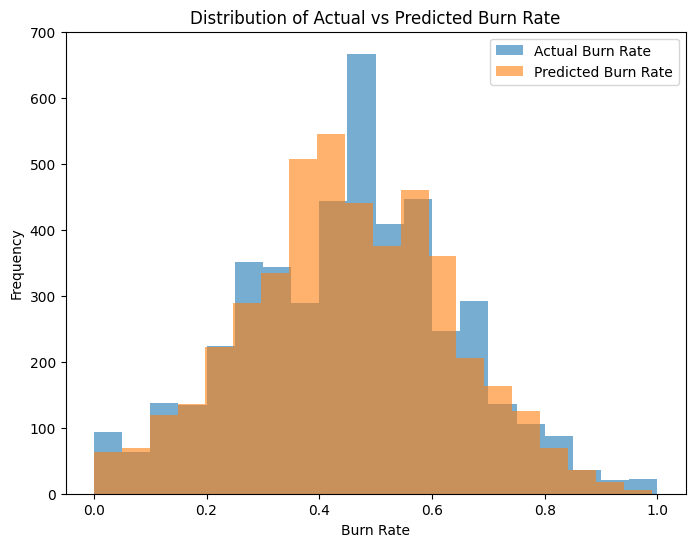

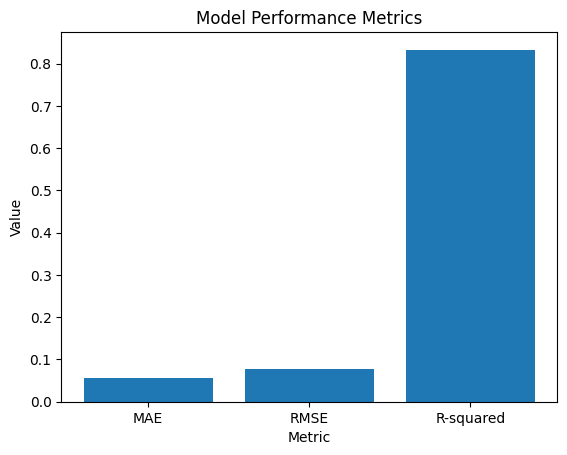

In [38]:
# Histogram of Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.hist(y_test, bins=20, alpha=0.6, label='Actual Burn Rate')
plt.hist(y_pred, bins=20, alpha=0.6, label='Predicted Burn Rate')
plt.xlabel("Burn Rate")
plt.ylabel("Frequency")
plt.title("Distribution of Actual vs Predicted Burn Rate")
plt.legend()
plt.show()


# Plotting model performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

metrics = {'MAE': mae, 'RMSE': rmse, 'R-squared': r2}
plt.bar(metrics.keys(), metrics.values())
plt.xlabel("Metric")
plt.ylabel("Value")
plt.title("Model Performance Metrics")
plt.show()

